#### 2.3.1. Загрузка данных и первичный анализ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)

In [ ]:
df = pd.read_csv('S06-hw-dataset-01.csv')
display(df.head())
display(df.info())
display(df.describe())
print("Пропусков в данных:")
display(df.isnull().sum())
# `X` – признаки (все столбцы, кроме `id` и `target`).
X = df.drop(columns=['id', 'target'])
# `y` – целевая переменная (столбец `target`).
y = df['target']

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

None

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


Пропусков в данных:


id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

#### 2.3.2. Train/Test-сплит и воспроизводимость

In [5]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Фиксированный сид гарнтирует воспроизводимость, также в дальнейшем для сравнения моделей
Стратификация нужна для баланса классов, также это гарант того что доля класса в train и test совпадает с исходной долей.

#### 2.3.3. Baseline’ы

In [11]:
# Обучим DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# Построим Pipeline с StandardScaler и LogisticRegression
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])
pipe_lr.fit(X_train, y_train)

# Оценим baseline'ы на test
y_pred_dummy = dummy.predict(X_test)
y_pred_lr = pipe_lr.predict(X_test)
y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]

print("BASELINE'Ы: ")

# Метрики для DummyClassifier
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)
dummy_auc = roc_auc_score(y_test, y_pred_dummy)

print(f"\nDummyClassifier (most_frequent):")
print(f"  Accuracy: {dummy_accuracy:.4f}")
print(f"  F1-score: {dummy_f1:.4f}")
print(f"  ROC-AUC:  {dummy_auc:.4f}")

# Метрики для LogisticRegression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

print(f"\nLogisticRegression (Pipeline):")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  F1-score: {lr_f1:.4f}")
print(f"  ROC-AUC:  {lr_auc:.4f}")

baselines = {
    "DummyClassifier": {"accuracy": dummy_accuracy, "f1": dummy_f1, "auc": dummy_auc},
    "LogisticRegression": {"accuracy": lr_accuracy, "f1": lr_f1, "auc": lr_auc}
}

BASELINE'Ы: 

DummyClassifier (most_frequent):
  Accuracy: 0.6767
  F1-score: 0.0000
  ROC-AUC:  0.5000

LogisticRegression (Pipeline):
  Accuracy: 0.8297
  F1-score: 0.7147
  ROC-AUC:  0.8789


#### 2.3.4. Модели недели 6 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import json

# Словарь для хранения результатов
models_results = {}
search_summaries = {}

# 1 DecisionTreeClassifier с контролем сложности

print("\n1 DecisionTreeClassifier")

dt_params = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_leaf": [1, 2, 5, 10]
}

dt_model = DecisionTreeClassifier(random_state=42)
dt_search = GridSearchCV(
    dt_model, dt_params, cv=5, scoring="roc_auc", n_jobs=-1, verbose=0
)
dt_search.fit(X_train, y_train)

print(f"  Лучшие параметры: {dt_search.best_params_}")
print(f"  Лучший CV-score (ROC-AUC): {dt_search.best_score_:.4f}")

# Предсказания на test
y_pred_dt = dt_search.predict(X_test)
y_proba_dt = dt_search.predict_proba(X_test)[:, 1]

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_proba_dt)

print(f"  Test Accuracy: {dt_accuracy:.4f}")
print(f"  Test F1-score: {dt_f1:.4f}")
print(f"  Test ROC-AUC:  {dt_auc:.4f}")

models_results["DecisionTree"] = {
    "accuracy": dt_accuracy,
    "f1": dt_f1,
    "auc": dt_auc
}
search_summaries["DecisionTree"] = {
    "best_params": dt_search.best_params_,
    "best_cv_score": float(dt_search.best_score_)
}

# 2 RandomForestClassifier

print("\n2 RandomForestClassifier")

rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_leaf": [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_search = GridSearchCV(
    rf_model, rf_params, cv=5, scoring="roc_auc", n_jobs=-1, verbose=0
)
rf_search.fit(X_train, y_train)

print(f"  Лучшие параметры: {rf_search.best_params_}")
print(f"  Лучший CV-score (ROC-AUC): {rf_search.best_score_:.4f}")

# Предсказания на test
y_pred_rf = rf_search.predict(X_test)
y_proba_rf = rf_search.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_proba_rf)

print(f"  Test Accuracy: {rf_accuracy:.4f}")
print(f"  Test F1-score: {rf_f1:.4f}")
print(f"  Test ROC-AUC:  {rf_auc:.4f}")

models_results["RandomForest"] = {
    "accuracy": rf_accuracy,
    "f1": rf_f1,
    "auc": rf_auc
}
search_summaries["RandomForest"] = {
    "best_params": rf_search.best_params_,
    "best_cv_score": float(rf_search.best_score_)
}


# 3 GradientBoostingClassifier (Boosting)

print("\n3 GradientBoostingClassifier")

gb_params = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7]
}

gb_model = GradientBoostingClassifier(random_state=42, subsample=0.8)
gb_search = GridSearchCV(
    gb_model, gb_params, cv=5, scoring="roc_auc", n_jobs=-1, verbose=0
)
gb_search.fit(X_train, y_train)

print(f"  Лучшие параметры: {gb_search.best_params_}")
print(f"  Лучший CV-score (ROC-AUC): {gb_search.best_score_:.4f}")

# Предсказания на test
y_pred_gb = gb_search.predict(X_test)
y_proba_gb = gb_search.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_proba_gb)

print(f"  Test Accuracy: {gb_accuracy:.4f}")
print(f"  Test F1-score: {gb_f1:.4f}")
print(f"  Test ROC-AUC:  {gb_auc:.4f}")

models_results["GradientBoosting"] = {
    "accuracy": gb_accuracy,
    "f1": gb_f1,
    "auc": gb_auc
}
search_summaries["GradientBoosting"] = {
    "best_params": gb_search.best_params_,
    "best_cv_score": float(gb_search.best_score_)
}


1 DecisionTreeClassifier
  Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 10}
  Лучший CV-score (ROC-AUC): 0.9065
  Test Accuracy: 0.8780
  Test F1-score: 0.8036
  Test ROC-AUC:  0.9165

2 RandomForestClassifier
  Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
  Лучший CV-score (ROC-AUC): 0.9685
  Test Accuracy: 0.9323
  Test F1-score: 0.8900
  Test ROC-AUC:  0.9698

3 GradientBoostingClassifier
  Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
  Лучший CV-score (ROC-AUC): 0.9716
  Test Accuracy: 0.9353
  Test F1-score: 0.8961
  Test ROC-AUC:  0.9746


#### 2.3.5. Сравнение метрик качества

In [15]:
# Сведем все результаты в таблицу
all_results = {**baselines, **models_results}
results_df = pd.DataFrame(all_results).T
print("\n")
print(results_df.to_string())

# Определим лучшую модель по ROC-AUC
best_model_name = results_df["auc"].idxmax()
best_auc = results_df["auc"].max()

print(f"\nЛучшая модель по ROC-AUC: {best_model_name} (AUC = {best_auc:.4f})")

# Сохраняем метрики
metrics_test = all_results
with open("artifacts/metrics_test.json", "w") as f:
    json.dump(metrics_test, f, indent=2)

# Сохраняем гиперпараметры
with open("artifacts/search_summaries.json", "w") as f:
    json.dump(search_summaries, f, indent=2)



                    accuracy        f1       auc
DummyClassifier     0.676667  0.000000  0.500000
LogisticRegression  0.829667  0.714685  0.878909
DecisionTree        0.878000  0.803648  0.916456
RandomForest        0.932333  0.889973  0.969758
GradientBoosting    0.935333  0.896146  0.974609

Лучшая модель по ROC-AUC: GradientBoosting (AUC = 0.9746)


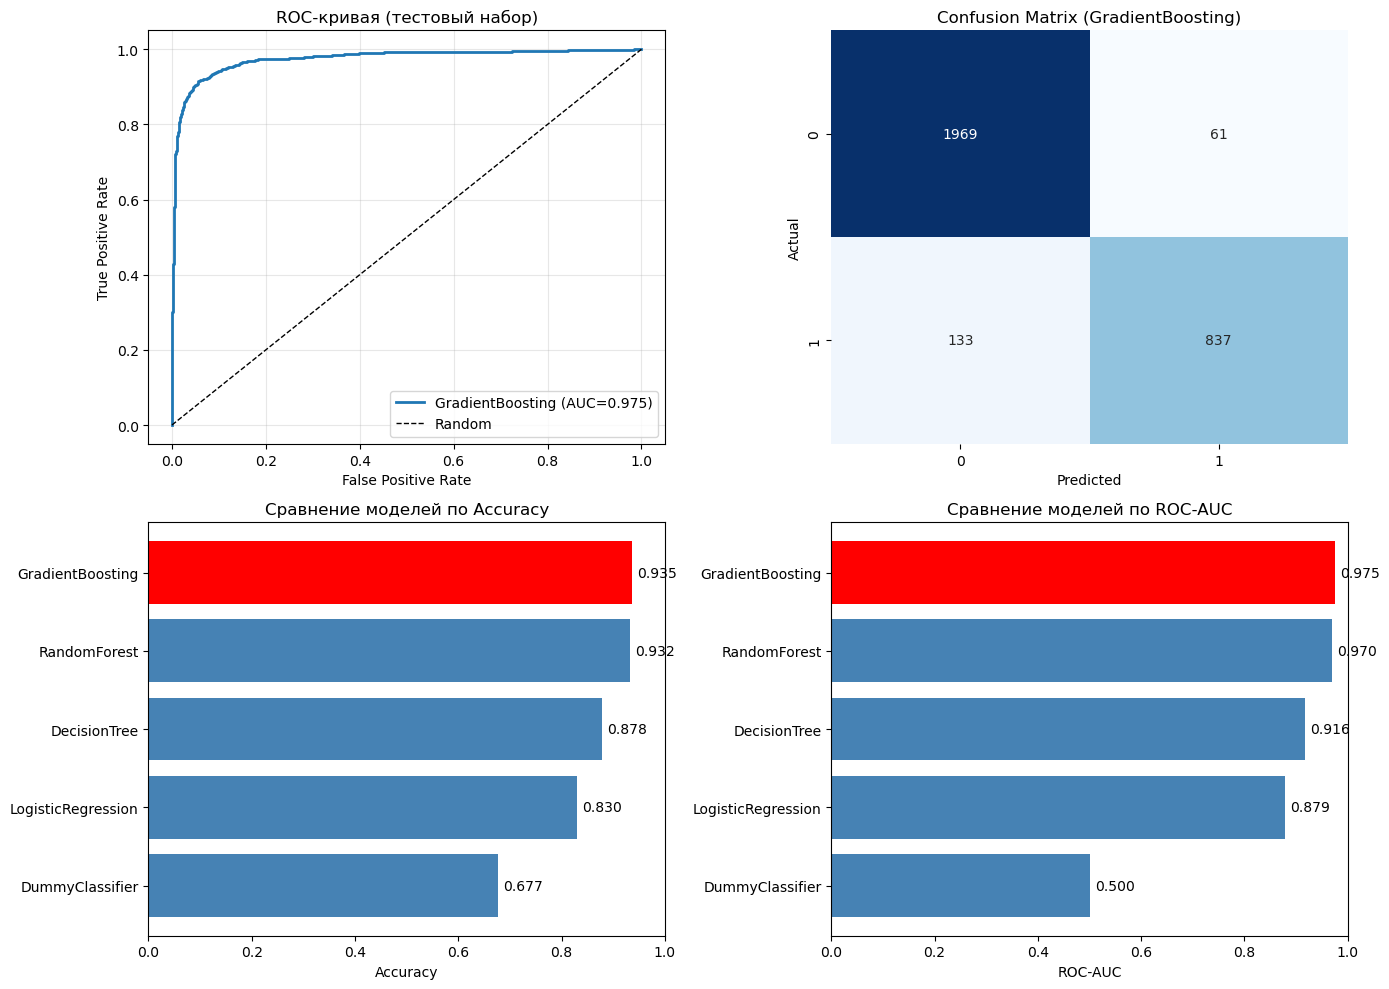

График сохранён: artifacts/figures/01_roc_and_comparison.png


In [16]:
# Подготовим предсказания лучшей модели для визуализаций
if best_model_name == "DecisionTree":
    best_proba = y_proba_dt
    best_pred = y_pred_dt
elif best_model_name == "RandomForest":
    best_proba = y_proba_rf
    best_pred = y_pred_rf
elif best_model_name == "GradientBoosting":
    best_proba = y_proba_gb
    best_pred = y_pred_gb
else:
    best_proba = y_proba_lr
    best_pred = y_pred_lr

# Графики
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1 ROC-кривая для лучшей модели
ax = axes[0, 0]
fpr, tpr, _ = roc_curve(y_test, best_proba)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, label=f'{best_model_name} (AUC={roc_auc:.3f})', lw=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random', lw=1)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC-кривая (тестовый набор)')
ax.legend()
ax.grid(alpha=0.3)

# 2 Confusion Matrix для лучшей модели
ax = axes[0, 1]
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(f'Confusion Matrix ({best_model_name})')

# 3 Сравнение моделей по Accuracy
ax = axes[1, 0]
models_names = list(all_results.keys())
accuracies = [all_results[m]["accuracy"] for m in models_names]
colors = ['red' if m == best_model_name else 'steelblue' for m in models_names]
ax.barh(models_names, accuracies, color=colors)
ax.set_xlabel('Accuracy')
ax.set_title('Сравнение моделей по Accuracy')
ax.set_xlim([0, 1])
for i, v in enumerate(accuracies):
    ax.text(v + 0.01, i, f'{v:.3f}', va='center')

# 4 Сравнение моделей по ROC-AUC
ax = axes[1, 1]
aucs = [all_results[m]["auc"] for m in models_names]
colors = ['red' if m == best_model_name else 'steelblue' for m in models_names]
ax.barh(models_names, aucs, color=colors)
ax.set_xlabel('ROC-AUC')
ax.set_title('Сравнение моделей по ROC-AUC')
ax.set_xlim([0, 1])
for i, v in enumerate(aucs):
    ax.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.savefig("artifacts/figures/01_roc_and_comparison.png", dpi=100, bbox_inches='tight')
plt.show()

print("График сохранён: artifacts/figures/01_roc_and_comparison.png")

#### 2.3.6. Интерпритация


Top-10 важных признаков (Permutation Importance):
feature  importance_mean  importance_std
  num19         0.115700        0.004591
  num18         0.103433        0.004759
  num07         0.058667        0.003474
  num04         0.028033        0.004446
  num24         0.020033        0.001048
  num20         0.013567        0.001660
  num14         0.011900        0.001752
  num01         0.011867        0.003113
  num21         0.010167        0.001424
  num22         0.007867        0.002252


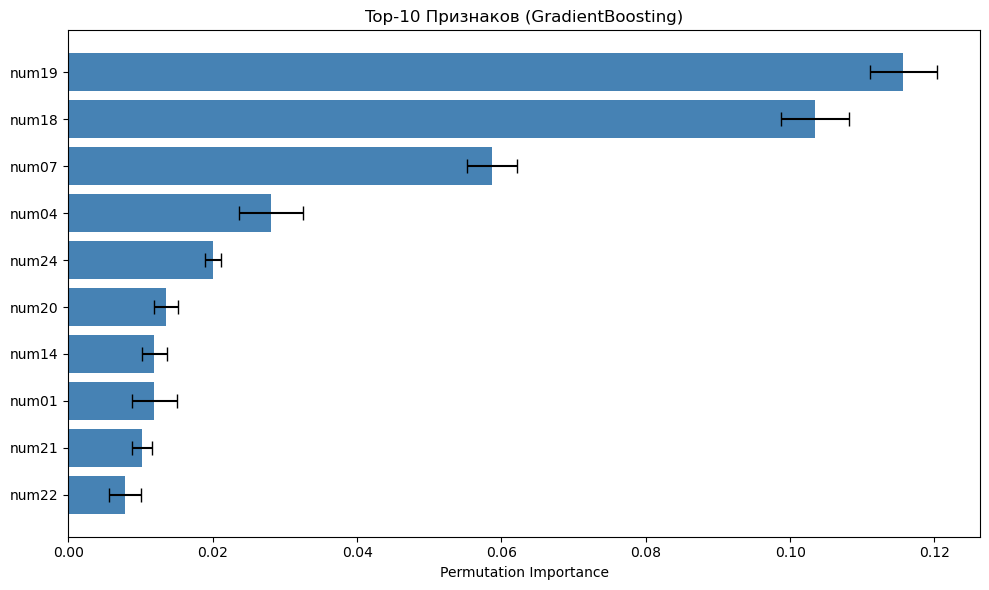


График сохранён: artifacts/figures/02_feature_importance.png

1 Лучшая модель: GradientBoosting
   - Accuracy: 0.9353
   - F1-score: 0.8961
   - ROC-AUC: 0.9746

2 Top-3 важных признака:
   num19: 0.1157
   num18: 0.1034
   num07: 0.0587

3 Сравнение с baseline'ами:
   - DummyClassifier AUC: 0.5000
   - LogisticRegression AUC: 0.8789
   - GradientBoosting AUC: 0.9746
   
   Улучшение над LogisticRegression:
   + 0.0957 по ROC-AUC



In [18]:
from sklearn.inspection import permutation_importance

# Получаем лучшую модель
if best_model_name == "DecisionTree":
    best_model_fitted = dt_search.best_estimator_
elif best_model_name == "RandomForest":
    best_model_fitted = rf_search.best_estimator_
elif best_model_name == "GradientBoosting":
    best_model_fitted = gb_search.best_estimator_
else:
    best_model_fitted = pipe_lr

# Вычисляем permutation importance
perm_importance = permutation_importance(
    best_model_fitted, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Создаем DataFrame с результатами
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\nTop-10 важных признаков (Permutation Importance):")
print(importance_df.head(10).to_string(index=False))

# Сохраняем важные признаки
importance_dict = dict(zip(importance_df['feature'], importance_df['importance_mean']))
with open("artifacts/feature_importance.json", "w") as f:
    json.dump(importance_dict, f, indent=2)

# Визуализация важности признаков
fig, ax = plt.subplots(figsize=(10, 6))
top_n = 10
top_features = importance_df.head(top_n)
ax.barh(range(len(top_features)), top_features['importance_mean'], 
        xerr=top_features['importance_std'], color='steelblue', capsize=5)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['feature'])
ax.set_xlabel('Permutation Importance')
ax.set_title(f'Top-{top_n} Признаков ({best_model_name})')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("artifacts/figures/02_feature_importance.png", dpi=100, bbox_inches='tight')
plt.show()

print(f"\nГрафик сохранён: artifacts/figures/02_feature_importance.png")

# Выводы
print(f"""
1 Лучшая модель: {best_model_name}
   - Accuracy: {all_results[best_model_name]['accuracy']:.4f}
   - F1-score: {all_results[best_model_name]['f1']:.4f}
   - ROC-AUC: {all_results[best_model_name]['auc']:.4f}

2 Top-3 важных признака:
   {importance_df.iloc[0]['feature']}: {importance_df.iloc[0]['importance_mean']:.4f}
   {importance_df.iloc[1]['feature']}: {importance_df.iloc[1]['importance_mean']:.4f}
   {importance_df.iloc[2]['feature']}: {importance_df.iloc[2]['importance_mean']:.4f}

3 Сравнение с baseline'ами:
   - DummyClassifier AUC: {all_results['DummyClassifier']['auc']:.4f}
   - LogisticRegression AUC: {all_results['LogisticRegression']['auc']:.4f}
   - {best_model_name} AUC: {all_results[best_model_name]['auc']:.4f}
   
   Улучшение над LogisticRegression:
   + {(all_results[best_model_name]['auc'] - all_results['LogisticRegression']['auc']):.4f} по ROC-AUC
""")

#### 2.4. Сохранение артефактов

In [20]:
# Сохраняем лучшую модель
joblib.dump(best_model_fitted, "artifacts/best_model.joblib")
print("✓ Модель сохранена: artifacts/best_model.joblib")

# Сохраняем метаданные лучшей модели
best_model_meta = {
    "model_name": best_model_name,
    "best_params": search_summaries.get(best_model_name, {}).get("best_params", "N/A"),
    "test_metrics": {
        "accuracy": float(all_results[best_model_name]["accuracy"]),
        "f1": float(all_results[best_model_name]["f1"]),
        "auc": float(all_results[best_model_name]["auc"])
    },
    "cv_score": float(search_summaries.get(best_model_name, {}).get("best_cv_score", 0))
}

with open("artifacts/best_model_meta.json", "w") as f:
    json.dump(best_model_meta, f, indent=2)

print("Метаданные сохранены: artifacts/best_model_meta.json")

✓ Модель сохранена: artifacts/best_model.joblib
Метаданные сохранены: artifacts/best_model_meta.json
